In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

papers_df = pd.read_csv("SCIPdb.csv")

papers_df.head(2)

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,P2DP7JIP,journalArticle,2021,"Strong, Brent; Oostema, J. Adam; Nikroo, Nadia...",Early Termination of Acute Stroke Randomized C...,Circulation. Cardiovascular quality and outcomes,NaN,1941-7705 1941-7713,10.1161/CIRCOUTCOMES.121.007995,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3JUQ32JQ,journalArticle,2021,"Clark, L; Mitchell, N; Hewitt, C; Torgerson, D",Exploring engagement with authors of randomise...,F1000Research,NaN,NaN,10.12688/f1000research.27918.1,https://f1000research.com/articles/10-83/v1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
import os
from langchain.document_loaders import PyPDFLoader
from tqdm import tqdm

files = papers_df["File Attachments"]
all_data = []
errored_files = []
i = 0
for file in tqdm(files[:1]):
    try:
        file = file.replace("\\", "/").replace(';', '')
        loader = PyPDFLoader(file.strip())
        data = loader.load()
        print(data)
        for d in data:
            d.metadata['Publication Year'] = int(papers_df['Publication Year'][i])
            d.metadata['Date Added'] = int(papers_df['Date Added'][i][:4])
            d.metadata['Author'] = str(papers_df['Author'][i])
            d.metadata['Title'] = str(papers_df['Title'][i])
            del d.metadata['page']
        all_data.append(data)
    except Exception as e:
        #print(e)
        errored_files.append(file)
    finally:
        i += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.12s/it]

[Document(page_content='Circulation: Cardiovascular Quality and Outcomes1270\nCirculation: Cardiovascular Quality and Outcomes is available at http://www.ahajournals.org/journal/circoutcomes Circ Cardiovasc Qual Outcomes. 2021;14:e007995. DOI: 10.1161/CIRCOUTCOMES.121.007995 December 2021 \nCorrespondence to: Mathew J. Reeves, PhD, Department of Epidemiology and Biostatistics, Michigan State University, B601 W Fee Hall, East Lansing, MI 48824. \nEmail reevesm@msu.edu\nSupplemental material is available at https://www.ahajournals.org/doi/suppl/10.1161/CIRCOUTCOMES.121.007995.\nFor Sources of Funding and Disclosures, see page 1278.\n© 2021 American Heart Association, Inc.ORIGINAL ARTICLE\nEarly Termination of Acute Stroke Randomized \nControlled Trials Published Between 2013 and \n2020: A Systematic Review\nBrent Strong , BS; J. Adam Oostema, MD; Nadia Nikroo , BS; Murtaza Hussain , MD; Mathew J. Reeves , PhD\nBACKGROUND:  Termination of a clinical trial before the maximum planned sample

In [19]:
for data in all_data:
    s = ''
    for d in data:
        s += d.page_content

In [76]:
import re

def divide_paper_into_sections(paper_text):
    section_pattern = re.compile(r'(Abstract|Background|Introduction|Methods|Methodology|Results|Discussion|Conclusion)', re.IGNORECASE)

    matches = list(section_pattern.finditer(paper_text))

    sections = {}

    for i, match in enumerate(matches):
        start_index = match.start()
        end_index = matches[i + 1].start() if i + 1 < len(matches) else len(paper_text)
        section_title = match.group()
        section_text = paper_text[start_index:end_index].strip()
        sections[section_title] = section_text

    return sections


sections = divide_paper_into_sections(s)

for title, text in sections.items():
    print(f"{title}:\n{text}\n")


BACKGROUND:
BACKGROUND:  Termination of a clinical trial before the maximum planned sample size is accrued can occur for multiple valid 
reasons but has implications for the interpretation of

results:
results database: evaluation of availability of primary outcome 
data and reasons for termination. PLoS One. 2015;10:e0127242. doi: 
10.1371/journal.pone.0127242
 22. Tharmanathan P, Calvert M, Hampton J, Freemantle N. The use of interim 
data and data monitoring committee recommendations in randomized con-
trolled trial reports: frequency, implications and potential sources of bias. 
BMC Med Res Methodol. 2008;8:12. doi: 10.1186/1471-2288-8-12
 23. Dechartres A, Trinquart L, Atal I, Moher D, Dickersin K, Boutron I, 
Perrodeau E, Altman DG, Ravaud P. Evolution of poor reporting and inad-
equate

METHODS:
METHODS
Registration, Data Availability, and Approval
The a priori study protocol and subsequent revisions are avail-
able in the PROSPERO database (CRD42019128727). 
Because this system

In [77]:
s

"Circulation: Cardiovascular Quality and Outcomes1270\nCirculation: Cardiovascular Quality and Outcomes is available at http://www.ahajournals.org/journal/circoutcomes Circ Cardiovasc Qual Outcomes. 2021;14:e007995. DOI: 10.1161/CIRCOUTCOMES.121.007995 December 2021 \nCorrespondence to: Mathew J. Reeves, PhD, Department of Epidemiology and Biostatistics, Michigan State University, B601 W Fee Hall, East Lansing, MI 48824. \nEmail reevesm@msu.edu\nSupplemental material is available at https://www.ahajournals.org/doi/suppl/10.1161/CIRCOUTCOMES.121.007995.\nFor Sources of Funding and Disclosures, see page 1278.\n© 2021 American Heart Association, Inc.ORIGINAL ARTICLE\nEarly Termination of Acute Stroke Randomized \nControlled Trials Published Between 2013 and \n2020: A Systematic Review\nBrent Strong , BS; J. Adam Oostema, MD; Nadia Nikroo , BS; Murtaza Hussain , MD; Mathew J. Reeves , PhD\nBACKGROUND:  Termination of a clinical trial before the maximum planned sample size is accrued can oc

In [138]:
import fitz  # PyMuPDF

def extract_headings(pdf_path):
    doc = fitz.open(pdf_path)
    headings = []
    styles = []

    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for b in blocks:  # Iterate through the text blocks
            if b['type'] == 0:  # Text block
                for l in b["lines"]:  # Iterate through text lines in the block
                    for s in l["spans"]:  # Iterate through text spans in the line
                        styles.append(s)
                        if s['size'] > 10 and s['size'] < 15:
                            #print(s)
                            headings.append(s['text'])
    
    return headings, styles


#headings = extract_headings('C:/Users/pouri/Zotero/storage/A9HTHS5G/Clark et al. - 2021 - Exploring engagement with authors of randomised co.pdf')
headings, styles = extract_headings('C:/Users/pouri/Zotero/storage/36QTIN44/Strong et al. - 2021 - Early Termination of Acute Stroke Randomized Contr.pdf')

for heading in headings:
    print(heading)


METHODS
Registration, Data Availability, and Approval
Eligibility Criteria and Search
WHAT IS KNOWN
WHAT THE STUDY ADDS
Nonstandard Abbreviations and Acronyms
Study Selection and Data Abstraction
Statistical Analysis
RESULTS
DISCUSSION


In [142]:
import pandas as pd

df = pd.DataFrame(styles)

In [146]:
font_size_threshold = df['size'].mean() + df['size'].std()
headings = df[df['size'] >= font_size_threshold]['text']

In [147]:
headings

0      Circulation: Cardiovascular Quality and Outcomes
13                                     ORIGINAL ARTICLE
14        Early Termination of Acute Stroke Randomized 
15        Controlled Trials Published Between 2013 and 
16                            2020: A Systematic Review
58                                                    C
131                                             METHODS
132       Registration, Data Availability, and Approval
146                     Eligibility Criteria and Search
194                                       WHAT IS KNOWN
203                                 WHAT THE STUDY ADDS
221              Nonstandard Abbreviations and Acronyms
243                Study Selection and Data Abstraction
298                                Statistical Analysis
352                                             RESULTS
730                                          DISCUSSION
Name: text, dtype: object

In [22]:
#!pip install layoutparser

In [35]:
import layoutparser as lp

In [36]:
file_path = "C:/Users/pouri/Zotero/storage/36QTIN44/Strong et al. - 2021 - Early Termination of Acute Stroke Randomized Contr.pdf"

In [5]:
pdf_tokens, pdf_images = lp.load_pdf(file_path, load_images=True)

In [6]:
model = lp.AutoLayoutModel("lp://efficientdet/PubLayNet/tf_efficientdet_d0")

In [50]:
layout = model.detect(pdf_images[1])

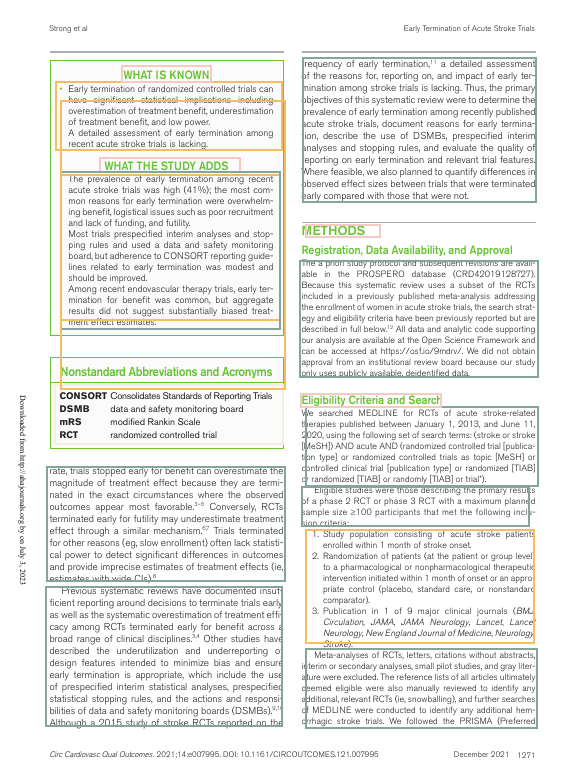

In [38]:
lp.draw_box(pdf_images[1], layout)

In [52]:
text_blocks = lp.Layout([b for b in layout])# if b.type=='Text'])

In [53]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [54]:
import numpy as np

image = np.array(pdf_images[1])

In [55]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [56]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [57]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

Previous systematic reviews have documented insuf-
ficient reparing around decision to terminate tals ea,
aswel a he systematic overestation of treatment eff
acy among RCT terminted esl for benefit across
broad range of ciel decipines"* Other studies have
deserted. the underutilzeton and undevreporing of
design features intended to minimize bas and ensure
aly termination i appropri, which include the use
of respected interim statistics! shales, prespecified
Staiseal stopping rules, and the actions and respons
bites of data and safety monitoring boards (OSMES)""*
‘Aithough a 2015 study of stroke RCTs reported on the

---
frequency of ealy termination" a detailed assessment
af the reasons fr, reporting o, and impact of eary tr
mination among evoke tal i lacking, Tus, he primary
objectives of tis systematic review wereta determina the
pravalance of eal temnaton among recent published
cute stoke tral, document reason for ear termina-
tion, describe the use of DSMBs, prespecsed interim
anae